# Project1

The bank robber algorithm

--------------

You are a bank robber who's looking to rob as many banks in a day before you flee the country.

You got your hands on a list of banks in the area, with their location, the amount of money they have and the time they will take to rob. It looks like this:

```
id, x_coordinate, y_coordinate, money, time (hr)
0, 11.4, 3.3, 5000, 0.6
1, 6.9, 7.1, 15000, 0.3
2, 1.4, 13.2, 900, 1.1
```

This list of banks is in `bank_data.csv`

You have **24 hours** to make as much money as possible then escape.

# Rules:

- Your run can start anywhere on the map but it has to end at the **helicopter escape zone**: coordinates (0,0)
    - If you try to rob too many banks and can't get to the helicopter in 24 hours, you get caught and go to jail.

- You solution is a list or array of integers (eg. `[580, 433, 24, 998]`) where the numbers are the IDs of each banks. The ID of each bank is their index (their row index).

- You travel between banks at 30 km/h. You have to travel from one bank to the next!
    - Remember the formula to calculate the distance between two points.
    - The coordinates are in kilometers.
        - So (1, 1) and (1, 2) are one kilometer apart. 
        - This would take 1 / 30 hour = 2 minutes to travel

- Your solution should be an approximative/heuristic algorithm
    - This problem is NP-Hard, you won't find a fast enough algorithm that has the perfect solution
    - It doesn't need to find the best solution
    - Find the best solution you can!

- Your solution has to run on a common laptop in under 3 minutes for the 10,000 cities dataset
    - You can use everything you want to achieve this:
        - Use numpy, pandas, functions, algorithms
        - You can use parallelism
        - Use optimied libraries (pandas, numba, scipy, etc.)
    - Test your code on **small subsets** of the data so they run fast
        - Then scale your code up to bigger chunks of the data

- Your input is a pandas dataframe with the bank data. Your output is a list of bank IDs in order that you rob them:

**Ex:**

```
df = pd.read_csv('bank_data.csv')
robber_algorithm(df)

# Output is a list of bank IDs
[OUTPUT] --> [664, 2341, 26, 998, 9583, 24, 1, 444, 6783]
```

# Checking Your Solution:

You can use the `check_solution` function from `check_solution.py` to test if your solution is valid and verify the score.

# Hints:

- Most of the design paradigms we saw in class will work for this:
    - Divide-and-conquer
    - Brute Force
    - Greedy Algorithm
    - Dynamic Programming
    - Backtracking
    - Breadth-first & Depth-first search
    - Some we haven't seen:
        - Branch & Bound
        - Prune & Search
 
 Start with something that's easier (brute-force or greedy algorithm) and then work towards a better design once it works.
 
 - Because there are too many banks at each step, you will need to select only some candidates to explore
 
 - If you find yourself doing many **Nearest neighbors** type queries, consider using a [KD-Tree](https://en.wikipedia.org/wiki/K-d_tree) or a Ball Tree to speed it up.
     - There are good implementations of KD-Trees and nearest neighbours in scipy, sklearn and [this library](https://github.com/lmcinnes/pynndescent)

- You can work your algorithm backwards (starting at the end and backing up to the starting point) or forwards (finding a starting point and looping until there is no time left). They will lead to different designs however


In [102]:
import pandas as pd
import math
import numpy as np
from check_solution import check_solution

data = pd.read_csv("bank_data.csv",)
df = pd.DataFrame(data)


In [103]:
df['weight'] = (df['money'] / df['time (hr)'] )
#df['to_h'] = (math.dist  ((df['x_coordinate'],df['y_coordinate']),(0,0)))
df['to_h'] = np.sqrt((df['x_coordinate'])**2+(df['y_coordinate'])**2)/30
df['weight_new'] = (df['money'] / (df['time (hr)'] + df['to_h']) )
#df['robbed'] = 'no'

In [104]:
dfs=df.sort_values(by=['weight'],ascending=False) #change to weight

In [105]:
def get_neighbor (cb_x,cb_y,radius):
    for (k, row) in dfs.iterrows():
        if row.id not in  travel_list:
            dist = math.dist  ((cb_x,cb_y),(row.x_coordinate,row.y_coordinate))     
            if dist <= radius:
                btr_id = row.id
                btr_x = row.x_coordinate
                btr_y = row.y_coordinate
                btr_money = row.money
                btr_time = row['time (hr)']
                return btr_id, btr_x, btr_y, btr_money, btr_time

In [106]:
#check distance between  previous an current bank
prev_x=0
prev_y=0
tot_money = 0
tot_time = 0.0
target_hours = 24
to_h = 0
radius = 1.5
travel_list  = []
travel_list2 =[]


#initialize first value
prev_x = dfs.x_coordinate.iloc[0]
prev_y = dfs.y_coordinate.iloc[0]
tot_money = dfs.money.iloc[0]
tot_time = dfs['time (hr)'].iloc[0]
travel_list.append (dfs.id.iloc[0]) 
print(f'tot time = {tot_time} target: {target_hours}')

#get to the helicopter location
to_h = math.dist  ((prev_x,prev_y),(0,0)) / 30.0

while (round((tot_time + to_h),1)) < target_hours: 
    next_id,next_x, next_y, next_money,next_time = get_neighbor(prev_x,prev_y,radius)
    to_h = math.dist  ((next_x,next_y),(0,0)) / 30.0
    to_new_loc =   math.dist  ((prev_x,prev_y),(next_x,next_y)) / 30.0
    if (tot_time + to_new_loc + to_h) < target_hours:
        tot_time += next_time + to_new_loc
        tot_money += next_money
        prev_x = next_x
        prev_y = next_y
        travel_list.append  (int(next_id))

tot_time += to_h

print(f'Total Money Robbed: & {tot_money} in 24 hours')
print(tot_time)

tot time = 0.00018569067816437407 target: 24
Total Money Robbed: & 13533900.0 in 24 hours
23.969441793350924


In [86]:
#dfs=df.sort_values(by=['weight'],ascending=False) #change to weight
# #check distance between  previous an current bank
# prev_x=0
# prev_y=0
# tot_money = 0
# tot_time = 0
# target_hours = 24.0
# to_h = 0
# cp = 15
# a_to_b_time = 1
# travel_list  = []
# for (k, column) in dfs.iterrows():
#     if math.dist  ((prev_x,prev_y),(0,0)) < cp:
#         if tot_money == 0 :
#             prev_x = column[1]
#             prev_y = column[2]
#             tot_money = column[3]
#             tot_time = column[4]
#             travel_list.append (column[0]) #((column[0],tot_time,tot_money))
#             dfs.robbed = 'yes'
#         else:
#             to_h = math.dist  ((prev_x,prev_y),(0,0)) / 30.0
#             to_new_loc =   math.dist  ((prev_x,prev_y),(column[1],column[2])) / 30.0
#             if round((tot_time + to_h + column[4] + to_new_loc),1) < target_hours:
#                 if to_new_loc <= a_to_b_time:
#                     tot_time += column[4] + to_new_loc
#                     tot_money += column[3]
#                     prev_x = column[1]
#                     prev_y = column[2]
#                     travel_list.append  (column[0]) #((column[0],tot_time,tot_money))
                
# tot_time += to_h

# print(f'Total Money Robbed: & {tot_money} in 24 hours')
# print(tot_time)

Total Money Robbed: & 6439300.0 in 24 hours
24.028215843141652


In [107]:
# Check solution
print(f"Running check_solution")
check_solution(travel_list, df.copy())

Running check_solution
Time Remaining: 0.03055820664910791


13533900.0

In [108]:
# by ID= 299 100
# Weight Desc= 300 100

import matplotlib.pyplot as plt
def verify(travel_list, df):
    plt.plot(df.x_coordinate[travel_list], df.y_coordinate[travel_list])
    print(f'{len(travel_list)} banks robbed for a total of {sum(df.money[travel_list])} dollars')

258 banks robbed for a total of 13533900 dollars


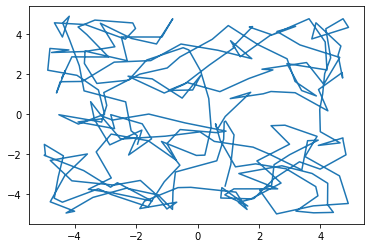

In [109]:
verify(travel_list,df)

In [110]:
travel_list

[3613,
 9546,
 7544,
 9195,
 3798,
 4987,
 5610,
 433,
 5135,
 8562,
 3914,
 209,
 951,
 9881,
 58,
 6987,
 4725,
 8206,
 8469,
 9401,
 9736,
 2656,
 8966,
 5126,
 9241,
 2928,
 9378,
 5296,
 1397,
 2346,
 2741,
 9049,
 3297,
 5155,
 9275,
 670,
 1372,
 1733,
 7595,
 6254,
 5719,
 9653,
 6528,
 8550,
 8436,
 6097,
 8287,
 7074,
 7258,
 7064,
 4696,
 1757,
 4605,
 8355,
 4789,
 8849,
 3026,
 6740,
 7701,
 2729,
 7764,
 7649,
 517,
 5622,
 5562,
 4906,
 7087,
 4345,
 3516,
 6317,
 8908,
 2827,
 4287,
 8690,
 4757,
 4499,
 7343,
 5933,
 3803,
 7560,
 487,
 8579,
 6468,
 4762,
 2331,
 8286,
 2521,
 8703,
 1914,
 8022,
 3193,
 3926,
 8525,
 2243,
 8375,
 1997,
 6104,
 613,
 6759,
 5356,
 1447,
 7265,
 4293,
 7531,
 781,
 6216,
 3186,
 8829,
 4362,
 2643,
 1424,
 4234,
 1053,
 2028,
 9529,
 8503,
 4056,
 9290,
 8169,
 6281,
 2194,
 9928,
 664,
 4036,
 1599,
 9908,
 1193,
 7689,
 7877,
 1961,
 3136,
 4175,
 3917,
 3502,
 8405,
 4084,
 9196,
 9460,
 9170,
 5627,
 7801,
 5399,
 2,
 4610,
 6478,